Found 3572 houses in price range ₹300,000 - ₹500,000


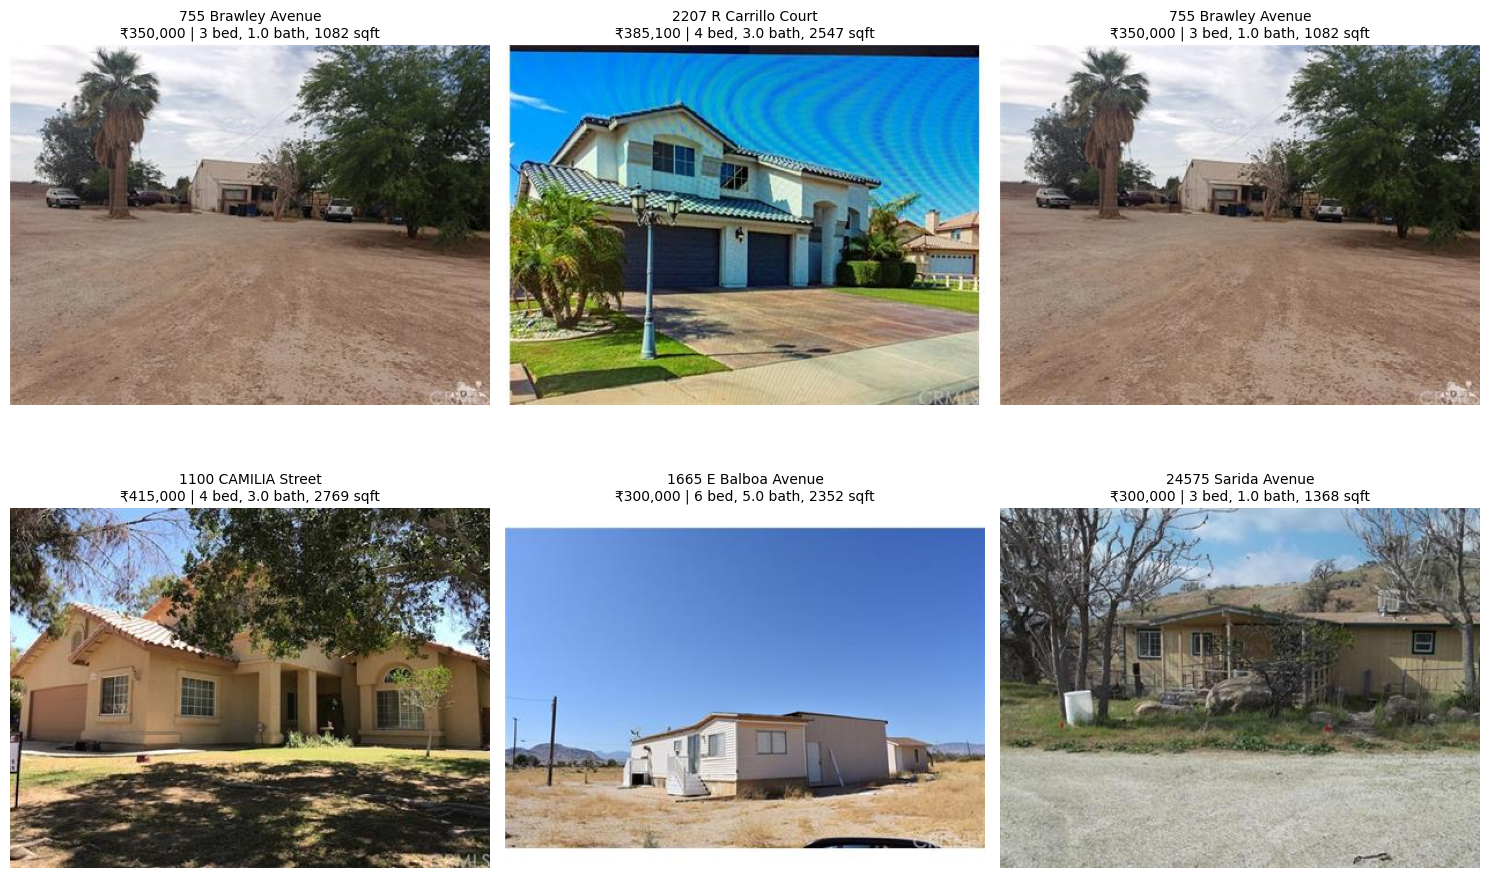

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load DataFrame directly
csv_path = r"C:\Users\sagni\Downloads\House Pricing\archive (1)\socal2.csv"
img_folder = r"C:\Users\sagni\Downloads\House Pricing\archive (1)\socal2\socal_pics"
df = pd.read_csv(csv_path)

def show_houses_in_price_range(df, img_folder, min_price, max_price, max_results=10):
    # Filter dataframe for price range
    filtered_df = df[(df['price'] >= min_price) & (df['price'] <= max_price)]
    print(f"Found {len(filtered_df)} houses in price range ₹{min_price:,} - ₹{max_price:,}")
    
    if len(filtered_df) == 0:
        print("No houses found in this range.")
        return
    
    # Limit to max_results
    filtered_df = filtered_df.head(max_results)
    
    # Plot images with details
    plt.figure(figsize=(15, 5 * ((len(filtered_df) + 2) // 3)))
    for idx, row in enumerate(filtered_df.itertuples()):
        img_filename = f"{row.image_id}.jpg"
        img_path = os.path.join(img_folder, img_filename)
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            plt.subplot((len(filtered_df)+2)//3, 3, idx+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{row.street}\n₹{row.price:,} | {row.bed} bed, {row.bath} bath, {row.sqft} sqft", fontsize=10)
        else:
            print(f"Image not found: {img_filename}")
    plt.tight_layout()
    plt.show()

# Example usage
show_houses_in_price_range(df, img_folder, min_price=300000, max_price=500000, max_results=6)


Enter city/location (e.g., Brawley, Calexico):  Brawley
Enter minimum price:  300000
Enter maximum price:  400000


Found 2 houses in 'Brawley' priced ₹300,000 - ₹400,000


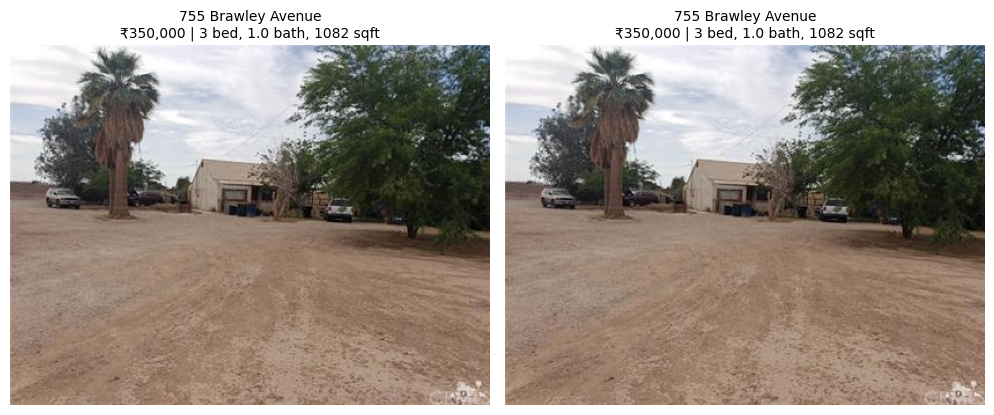

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load DataFrame (self-contained)
csv_path = r"C:\Users\sagni\Downloads\House Pricing\archive (1)\socal2.csv"
img_folder = r"C:\Users\sagni\Downloads\House Pricing\archive (1)\socal2\socal_pics"
df = pd.read_csv(csv_path)

# Function to show houses
def show_houses_by_location_and_price(df, img_folder, location, min_price, max_price, max_results=10):
    # Filter by location (case-insensitive partial match) and price
    filtered_df = df[
        (df['citi'].str.contains(location, case=False, na=False)) &
        (df['price'] >= min_price) &
        (df['price'] <= max_price)
    ]
    
    print(f"Found {len(filtered_df)} houses in '{location}' priced ₹{min_price:,} - ₹{max_price:,}")
    
    if len(filtered_df) == 0:
        print("No houses found for your criteria.")
        return
    
    # Limit to max_results
    filtered_df = filtered_df.head(max_results)
    
    # Plot images with details
    plt.figure(figsize=(15, 5 * ((len(filtered_df) + 2) // 3)))
    for idx, row in enumerate(filtered_df.itertuples()):
        img_filename = f"{row.image_id}.jpg"
        img_path = os.path.join(img_folder, img_filename)
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            plt.subplot((len(filtered_df)+2)//3, 3, idx+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{row.street}\n₹{row.price:,} | {row.bed} bed, {row.bath} bath, {row.sqft} sqft", fontsize=10)
        else:
            print(f"Image not found: {img_filename}")
    plt.tight_layout()
    plt.show()

# --- User Inputs ---
location = input("Enter city/location (e.g., Brawley, Calexico): ")
min_price = int(input("Enter minimum price: "))
max_price = int(input("Enter maximum price: "))

# Show houses
show_houses_by_location_and_price(df, img_folder, location, min_price, max_price, max_results=6)
